<a href="https://colab.research.google.com/github/KhyatiMahendru/Dimensionality-Reduction/blob/master/DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I have used 3 methods of Dimensionality Reduction:
- Principal Component Analysis
- Singular Value Decomposition
- t-distributed Stochastic Neighbor Embedding

I have used these techniques on two datasets:
- The Digits Dataset from sklearn
- MNIST Dataset - The "Hello World" of Computer Vision

In [1]:
! pip install ipython-autotime

In [0]:
# load time of execution for each block
%load_ext autotime

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.manifold import TSNE

time: 434 ms


# The Digits Dataset

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
data = digits.images[0]

time: 1.27 ms


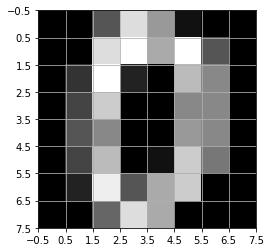

time: 166 ms


In [6]:
#Display the first digit
plt.imshow(data, cmap = 'gray', interpolation='nearest')
plt.xticks(np.arange(-0.5, 8.5, 1))
plt.yticks(np.arange(-0.5, 8.5, 1))
plt.grid(True)
plt.show()

In [7]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

time: 3.69 ms


In [8]:
digits.images[0].shape

(8, 8)

time: 2.95 ms


In [9]:
digits.data[0].shape

(64,)

time: 3.09 ms


In [10]:
digitsX = digits.data
digitsY = digits.target

time: 1.39 ms


### PCA on the Digits Dataset - 2 Components

In [11]:
pca2 = PCA(n_components = 2)
digits_pca2 = pca2.fit_transform(digitsX)

time: 21.7 ms


In [12]:
print(pca2.explained_variance_ratio_)
print(pca2.singular_values_)

[0.14890594 0.13618771]
[567.0065665  542.25185421]
time: 3.14 ms


In [13]:
digits_pca2 = pd.DataFrame(data = digits_pca2, columns = ['comp1', 'comp2'])
digits_pca2['label'] = digitsY

time: 5.1 ms


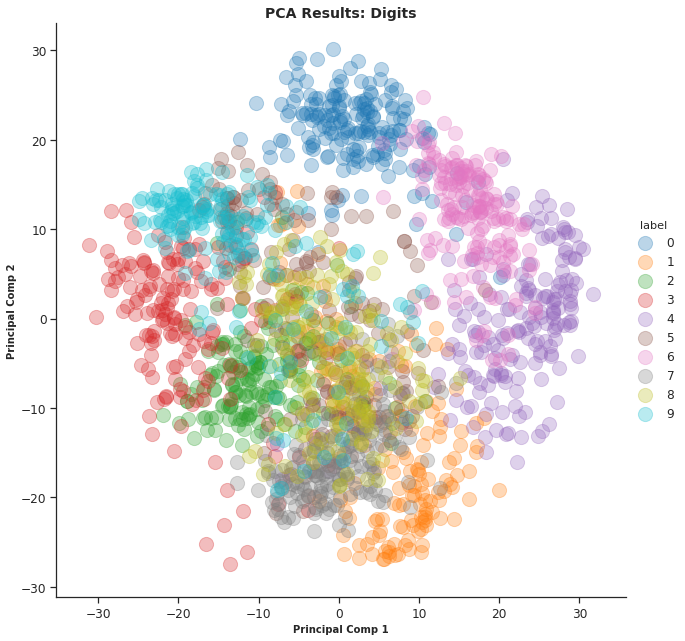

time: 770 ms


In [14]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='comp1',
           y='comp2',
           data=digits_pca2,
           fit_reg=False,
           legend=True,
           height=9,
           hue = 'label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Principal Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Comp 2', weight='bold').set_fontsize('10')

### SVD on Digits- 2 Components

In [15]:
svd2 = TruncatedSVD(n_components = 2)

time: 1 ms


In [16]:
digits_svd2 = svd2.fit_transform(digitsX)

time: 30.2 ms


In [17]:
digits_svd2 = pd.DataFrame(data = digits_svd2, columns = ['comp1', 'comp2'])
digits_svd2['label'] = digitsY

time: 7.32 ms


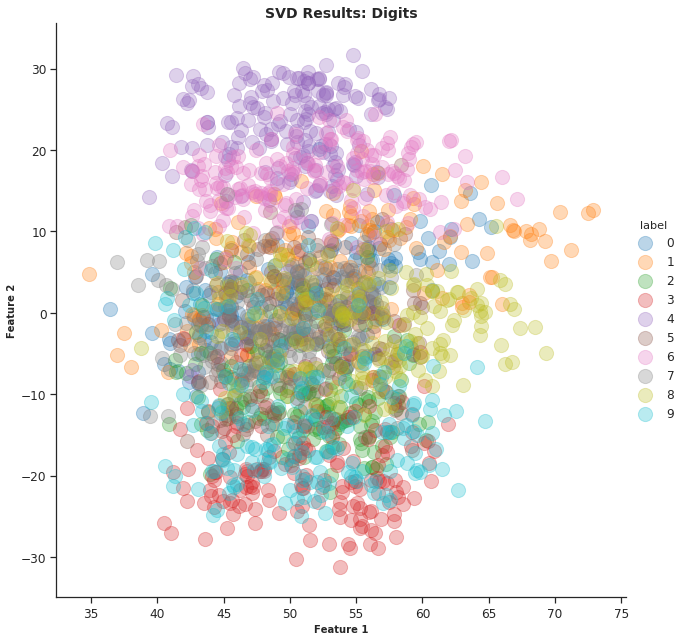

time: 780 ms


In [18]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='comp1',
           y='comp2',
           data=digits_svd2,
           fit_reg=False,
           legend=True,
           height=9,
           hue = 'label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('SVD Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Feature 1', weight='bold').set_fontsize('10')
plt.ylabel('Feature 2', weight='bold').set_fontsize('10')

### TSNE on Digits - 2 Components

In [19]:
tsne2 = TSNE(n_components = 2)
digits_tsne2 = tsne2.fit_transform(digitsX)

time: 10.4 s


In [20]:
digits_tsne2 = pd.DataFrame(data = digits_tsne2, columns = ['comp1', 'comp2'])
digits_tsne2['label'] = digitsY

time: 3.69 ms


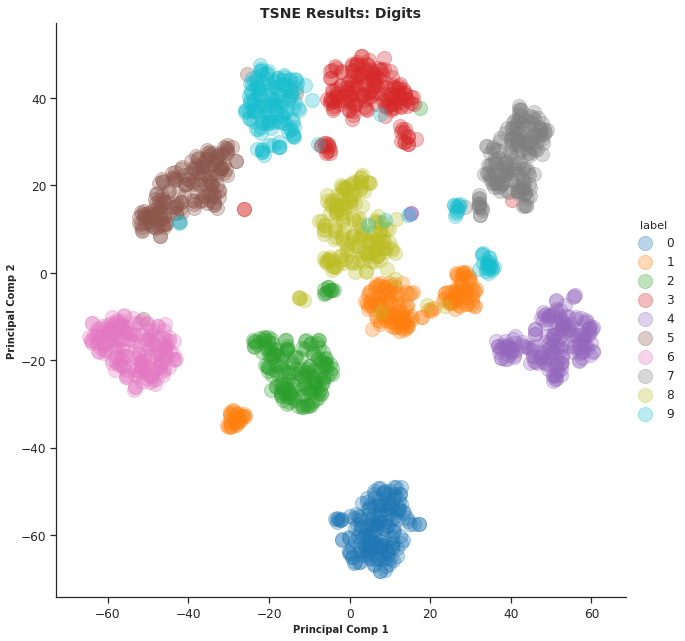

time: 664 ms


In [21]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='comp1',
           y='comp2',
           data=digits_tsne2,
           fit_reg=False,
           legend=True,
           height=9,
           hue = 'label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('TSNE Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Principal Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Comp 2', weight='bold').set_fontsize('10')

### PCA on Digits - 3 Components

In [22]:
pca3 = PCA(n_components = 3)
digits_pca3= pca3.fit_transform(digitsX)

time: 29.9 ms


In [23]:
digits_pca3.shape

(1797, 3)

time: 5.31 ms


In [24]:
digits_pca3 = pd.DataFrame(data = digits_pca3, columns = ['comp1', 'comp2', 'comp3'])
digits_pca3['label'] = digitsY

time: 3.69 ms


In [25]:
# This is the 3D plotting toolkit
from mpl_toolkits.mplot3d import Axes3D

time: 6.13 ms


No handles with labels found to put in legend.


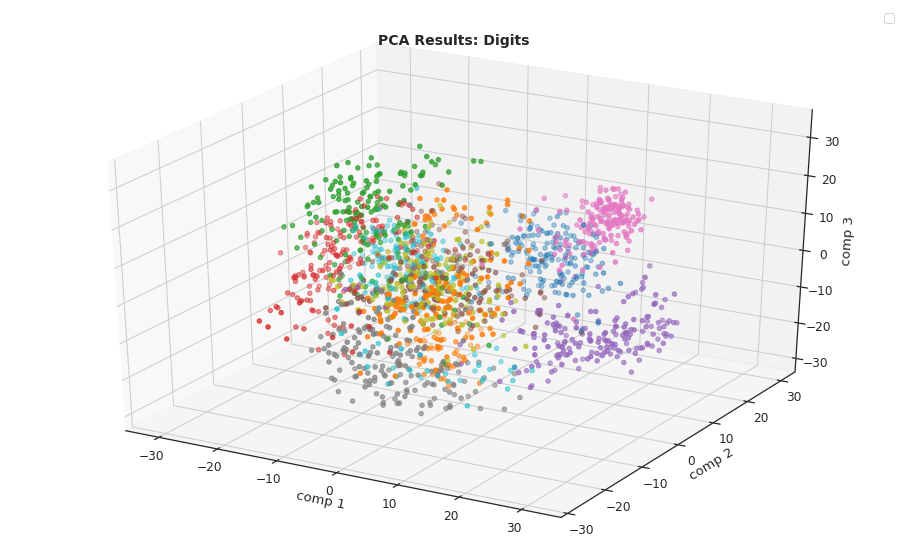

time: 550 ms


In [26]:
plt.figure(figsize = (16, 10))
ax = plt.axes(projection='3d')
ax.scatter(
    xs=digits_pca3.loc[:, 'comp1'], 
    ys=digits_pca3.loc[:, 'comp2'], 
    zs=digits_pca3.loc[:, 'comp3'], 
    c=digits_pca3.loc[:, 'label'], 
    cmap='tab10'
)
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_zlabel('comp 3')
ax.legend()
plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.show()

### SVD on Digits - 3 Components

In [27]:
svd3 = TruncatedSVD(n_components = 3)

time: 1.13 ms


In [28]:
digits_svd3 = svd3.fit_transform(digitsX)

time: 26.8 ms


In [29]:
digits_svd3 = pd.DataFrame(data = digits_svd3, columns = ['comp1', 'comp2', 'comp3'])
digits_svd3['label'] = digitsY

time: 3.26 ms


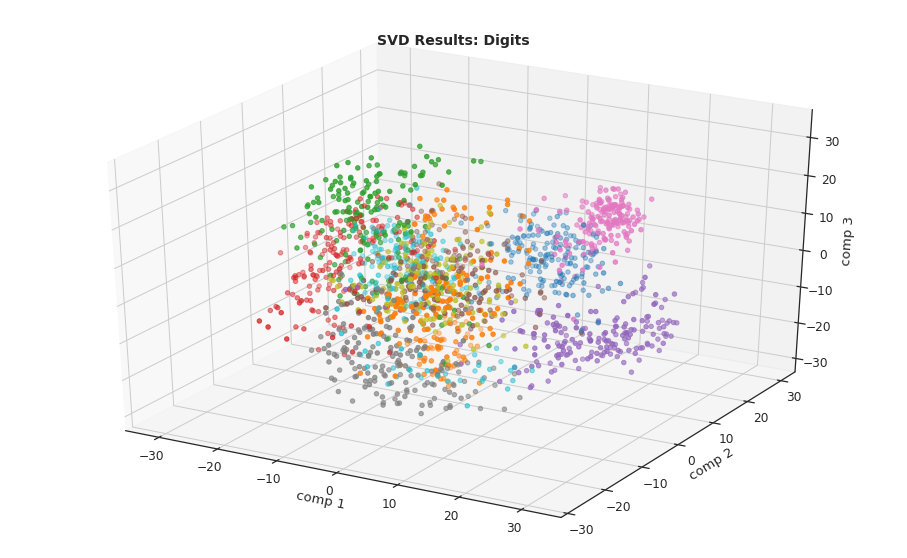

time: 532 ms


In [30]:
plt.figure(figsize = (16, 10))
ax = plt.axes(projection='3d')
ax.scatter(
    xs=digits_pca3.loc[:, 'comp1'], 
    ys=digits_pca3.loc[:, 'comp2'], 
    zs=digits_pca3.loc[:, 'comp3'], 
    c=digits_pca3.loc[:, 'label'], 
    cmap='tab10',
)
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_zlabel('comp 3')
plt.title('SVD Results: Digits', weight='bold').set_fontsize('14')
plt.show()

### TSNE on Digits - 3 Components

In [31]:
tsne3 = TSNE(n_components = 3)
digits_tsne3 = tsne3.fit_transform(digitsX)

time: 43.4 s


In [32]:
digits_tsne3 = pd.DataFrame(data = digits_tsne3, columns = ['comp1', 'comp2', 'comp3'])
digits_tsne3['label'] = digitsY

time: 5.72 ms


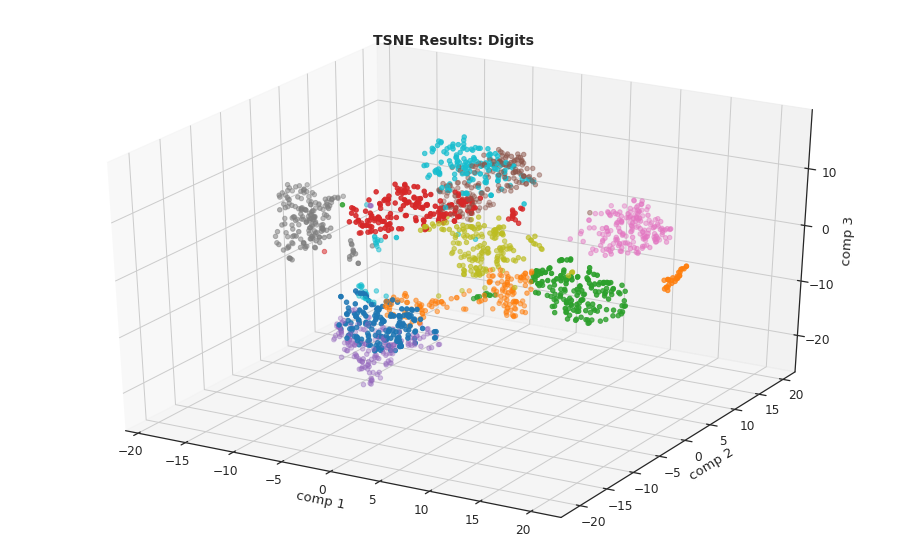

time: 511 ms


In [33]:
plt.figure(figsize = (16, 10))
ax = plt.axes(projection='3d')
ax.scatter(
    xs=digits_tsne3.loc[:, 'comp1'], 
    ys=digits_tsne3.loc[:, 'comp2'], 
    zs=digits_tsne3.loc[:, 'comp3'], 
    c=digits_tsne3.loc[:, 'label'], 
    cmap='tab10'
)
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_zlabel('comp 3')
plt.title('TSNE Results: Digits', weight='bold').set_fontsize('14')
plt.show()

# The MNIST Dataset

In [34]:
from sklearn.datasets import fetch_openml
mnistX, mnistY = fetch_openml('mnist_784', version=1, return_X_y=True)

time: 22.1 s


In [35]:
mnistX.shape

(70000, 784)

time: 3.66 ms


In [36]:
mnistY = mnistY.reshape(-1, 1)

time: 1.16 ms


In [37]:
np.random.seed(42)
idx = np.random.choice(a=70000, size = 10000)
mnistX = mnistX[idx, :]
mnistY = mnistY[idx, :]

time: 299 ms


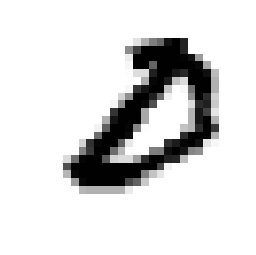

time: 88.9 ms


In [38]:
# first image
some_digit = mnistX[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=plt.cm.gray_r, interpolation="nearest")
plt.axis('off')
plt.show()

### PCA on MNIST - 2 Components

In [39]:
mnist_pca2 = pca2.fit_transform(mnistX)

time: 428 ms


In [40]:
mnist_pca2 = pd.DataFrame(data = mnist_pca2, columns = ['comp1', 'comp2'])
mnist_pca2['label'] = mnistY

time: 6.51 ms


In [41]:
print(pca2.explained_variance_ratio_)
print(pca2.singular_values_)

[0.09795321 0.07179778]
[57939.28724399 49604.29676713]
time: 3.64 ms


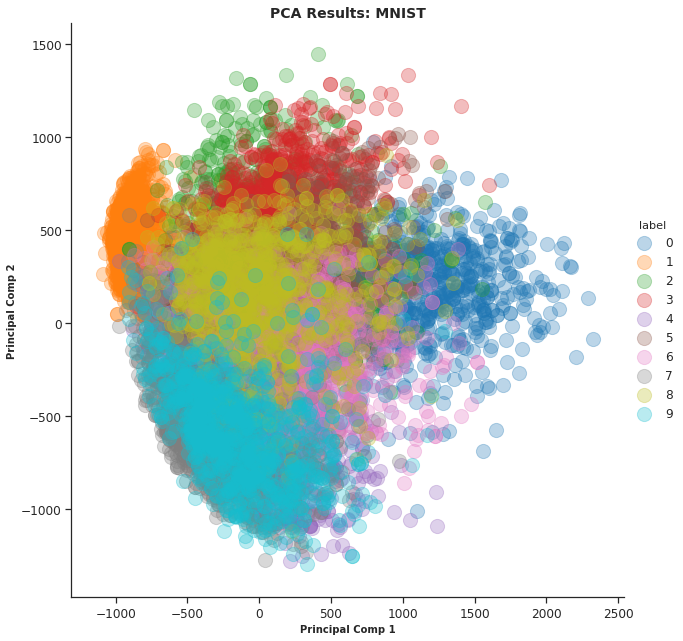

time: 1.06 s


In [42]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='comp1',
           y='comp2',
           data=mnist_pca2,
           fit_reg=False,
           legend=True,
           height=9,
           hue = 'label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: MNIST', weight='bold').set_fontsize('14')
plt.xlabel('Principal Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Comp 2', weight='bold').set_fontsize('10')

### SVD on MNIST - 2 Components

In [43]:
mnist_svd2 = svd2.fit_transform(mnistX)
mnist_svd2.shape

(10000, 2)

time: 392 ms


In [44]:
mnist_svd2 = pd.DataFrame(data = mnist_svd2, columns = ['comp1', 'comp2'])
mnist_svd2['label'] = mnistY

time: 6.17 ms


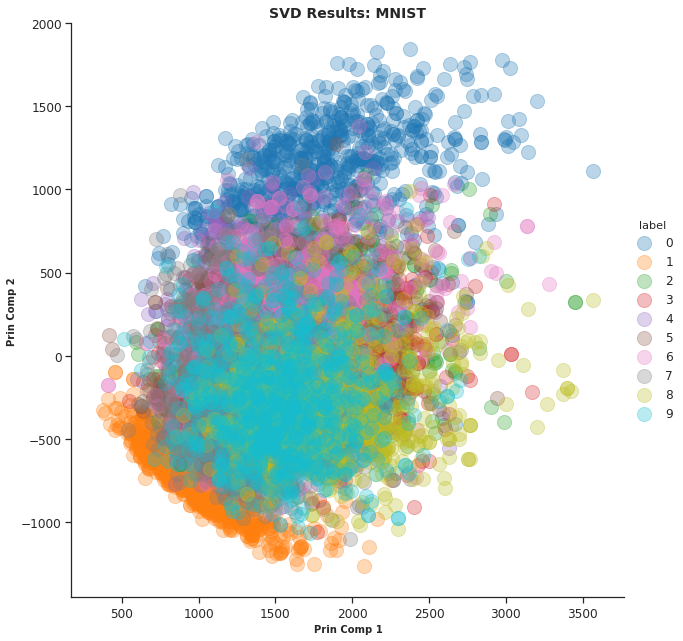

time: 1.05 s


In [45]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='comp1',
           y='comp2',
           data=mnist_svd2,
           fit_reg=False,
           legend=True,
           height=9,
           hue = 'label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('SVD Results: MNIST', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

### TSNE on MNIST - 2 Components

In [46]:
mnist_tsne2 = tsne2.fit_transform(mnistX)
mnist_tsne2.shape

(10000, 2)

time: 4min 8s


In [47]:
mnist_tsne2 = pd.DataFrame(data = mnist_tsne2, columns = ['comp1', 'comp2'])
mnist_tsne2['label'] = mnistY

time: 5.08 ms


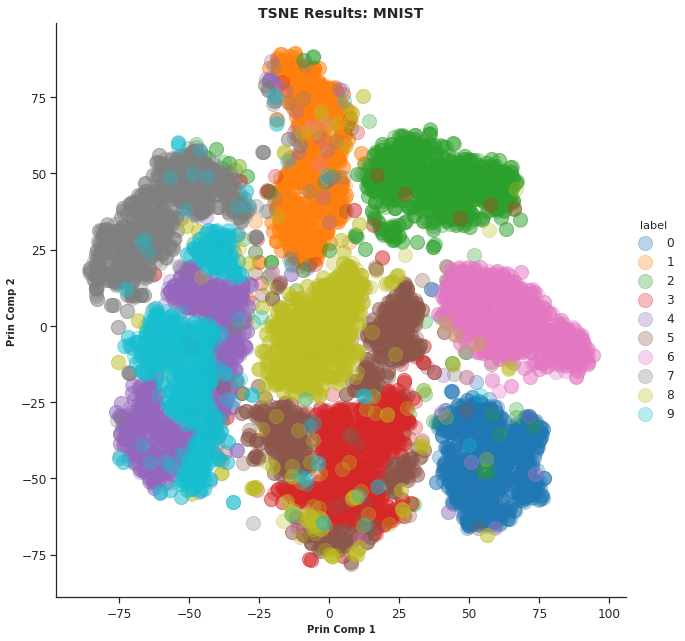

time: 1.01 s


In [48]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='comp1',
           y='comp2',
           data=mnist_tsne2,
           fit_reg=False,
           legend=True,
           height=9,
           hue = 'label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('TSNE Results: MNIST', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

### PCA on MNIST - 3 Components

In [49]:
mnist_pca3 = pca3.fit_transform(mnistX)

time: 457 ms


In [50]:
mnist_pca3 = pd.DataFrame(data = mnist_pca3, columns = ['comp1', 'comp2', 'comp3'])
mnist_pca3['label'] = mnistY

time: 8.97 ms


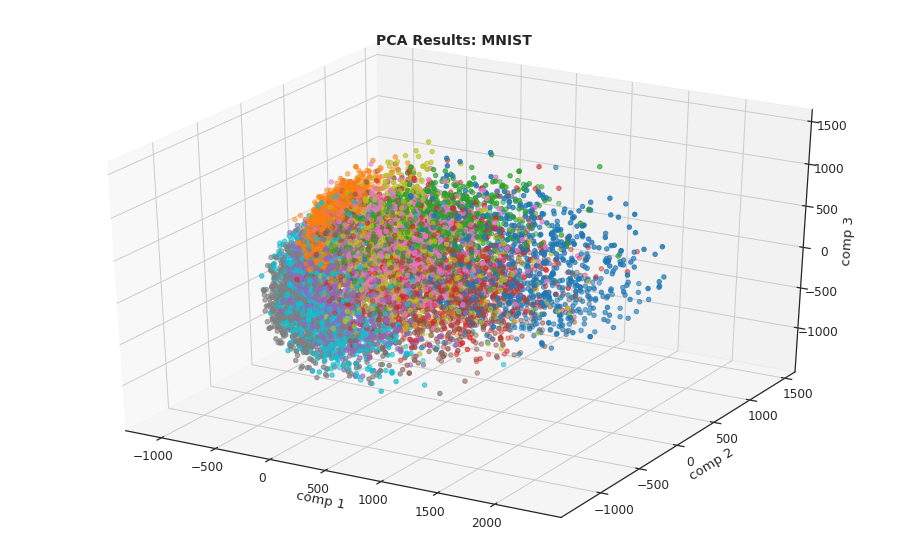

time: 1.21 s


In [51]:
plt.figure(figsize = (16, 10))
ax = plt.axes(projection='3d')
ax.scatter(
    xs=mnist_pca3.loc[:, 'comp1'], 
    ys=mnist_pca3.loc[:, 'comp2'], 
    zs=mnist_pca3.loc[:, 'comp3'], 
    c=mnist_pca3.loc[:, 'label'].astype(int), 
    cmap='tab10'
)
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_zlabel('comp 3')
plt.title('PCA Results: MNIST', weight='bold').set_fontsize('14')
plt.show()

### SVD on MNIST - 3 Components

In [52]:
mnist_svd3 = svd3.fit_transform(mnistX)

time: 336 ms


In [53]:
mnist_svd3 = pd.DataFrame(data = mnist_svd3, columns = ['comp1', 'comp2', 'comp3'])
mnist_svd3['label'] = mnistY

time: 5.94 ms


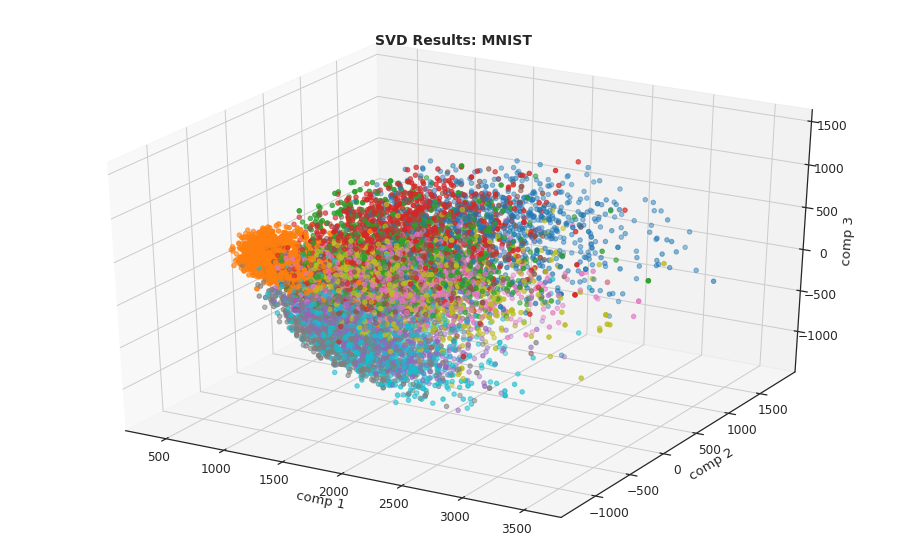

time: 1.16 s


In [54]:
plt.figure(figsize = (16, 10))
ax = plt.axes(projection='3d')
ax.scatter(
    xs=mnist_svd3.loc[:, 'comp1'], 
    ys=mnist_svd3.loc[:, 'comp2'], 
    zs=mnist_svd3.loc[:, 'comp3'], 
    c=mnist_svd3.loc[:, 'label'].astype(int), 
    cmap='tab10'
)
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_zlabel('comp 3')
plt.title('SVD Results: MNIST', weight='bold').set_fontsize('14')
plt.show()

### TSNE on MNIST - 3 Components

In [55]:
mnist_tsne3 = tsne3.fit_transform(mnistX)

time: 12min 35s


In [56]:
mnist_tsne3 = pd.DataFrame(data = mnist_tsne3, columns = ['comp1', 'comp2', 'comp3'])
mnist_tsne3['label'] = mnistY

time: 4.2 ms


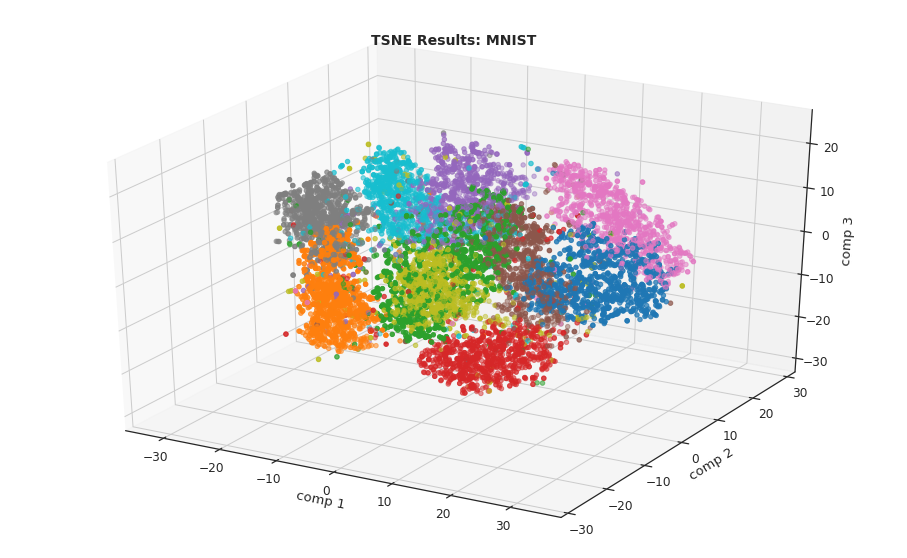

time: 1.16 s


In [57]:
plt.figure(figsize = (16, 10))
ax = plt.axes(projection='3d')
ax.scatter(
    xs=mnist_tsne3.loc[:, 'comp1'], 
    ys=mnist_tsne3.loc[:, 'comp2'], 
    zs=mnist_tsne3.loc[:, 'comp3'], 
    c=mnist_tsne3.loc[:, 'label'].astype(int), 
    cmap='tab10'
)
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_zlabel('comp 3')
plt.title('TSNE Results: MNIST', weight='bold').set_fontsize('14')
plt.show()